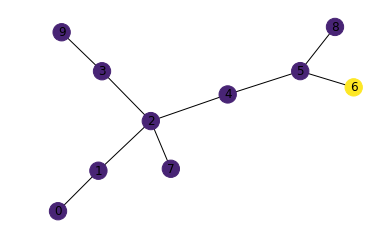

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
plt.rcParams["animation.html"] = "html5"



def DFS(G, start, size):
    order = []
    edges = G.edges()
    toExplore = [start]
    visited = [0]*size
    while len(toExplore) > 0:
        i = toExplore.pop()
        visited[i] = 1
        order.append(i)
        for j in edges:
            if i == j[0]:
                if visited[j[1]] == 0:
                    toExplore.append(j[1])
    return order

def BFS(G, start, size):
    order = [] 
    edges = G.edges()
    toExplore = [start]
    visited = [0]*size
    while len(toExplore)>0:
        i = toExplore.pop()
        visited[i] = 1
        order.append(i)
        for j in edges: 
            if i == j[0]:
                if visited[j[1]] == 0:
                    toExplore = [j[1]] + toExplore 
    return order

size = 10
start = 0
From = [0,1,2,2,4,2,5,5,3]
To = [1,2,3,4,5,7,6,8,9]
#From = [0,2,1,1,3,3,5,5]
#To = [1,4,2,3,5,6,7,8]
labels = {0: '0',1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9'}

# generate graph
df = pd.DataFrame({ 'from':From, 'to':To}, dtype=np.int8)
G=nx.from_pandas_edgelist(df,'from','to')

order = BFS(G, start, size)

frames = []
visited = [0]*size

for i in range(len(order)):
    temp = list(visited)
    temp[order[i]] = size
    frames.append(temp)
    visited[order[i]] = 1

frame = np.array(frames)
pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G,pos)
edges = nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G, pos, labels)

plt.axis('off')
#update frames, changes color of nodes during animation 
def update(i):
    nc = frame[i]
    nodes.set_array(nc)
    return nodes,
# output animation
fig = plt.gcf()
ani = FuncAnimation(fig, update, interval=1000, frames=len(order), blit=True)
ani.save('exampleBFS.mp4')